

# <font color='#0000CD'>Predictive Analysis of Liver Disease Based on Biochemical Markers: A Case Study from Northeast Andhra Pradesh, India</font>

## Model Building, Training, Evaluation, and Selection Process for Classification

#### This project aims to develop a machine learning model to predict the probability of patients developing liver disease based on a series of clinical characteristics.
#### We will use supervised learning techniques for classification, testing various algorithms to identify the most effective one.
#### Algorithms used:
* Logistic Regression
* Random Forest
* KNN
* Descision Tree
* SVM

#### The final model could assist doctors, hospitals, and governments in planning health budgets and formulating preventive policies.
#### This notebook will cover all stages of the machine learning process, from data preparation to model evaluation.
#### The dataset can be found here:[dataset](https://archive.ics.uci.edu/dataset/225/ilpd+indian+liver+patient+dataset)

#### Note: All models use `random_state = 1234` to ensure consistent and reproducible results across executions.








In [1]:
# Python Version
from platform import python_version
print('Python Version:', python_version())

Python Version: 3.9.7


In [2]:
# Imports
import joblib # Save model to disk
import pickle # Save model to disk
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split    # Split data into training and testing
from sklearn.model_selection import GridSearchCV        # Hyperparameter optimization
from sklearn.model_selection import cross_val_score     # Cross validation
from sklearn.model_selection import RandomizedSearchCV  # Hyperparameter optimization
from sklearn.linear_model import LogisticRegression     # Logistic regression function
from sklearn.ensemble import RandomForestClassifier     # Random forest classification algorithm
from sklearn.neighbors import KNeighborsClassifier      # KNN algorithm
from sklearn.tree import DecisionTreeClassifier         # Decision tree algorithm
from sklearn.svm import SVC                             # Support Vector Classifier
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
from sklearn.metrics import accuracy_score
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

import random
seed = 1234                                             # Defining the random seed
np.random.seed(seed)
random.seed(seed)

## Loading the Dataset

In [3]:
data = pd.read_csv('data/dataset.csv')

In [4]:
data.shape

(583, 11)

In [5]:
data.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [6]:
data.sample(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
380,50,Male,1.7,0.8,331,36,53,7.3,3.4,0.90,1
113,74,Male,0.6,0.1,272,24,98,5.0,2.0,0.60,1
301,51,Female,0.9,0.2,280,21,30,6.7,3.2,0.80,1
532,62,Male,0.7,0.2,162,12,17,8.2,3.2,0.60,2
73,52,Male,0.6,0.1,171,22,16,6.6,3.6,1.20,1
565,43,Male,22.5,11.8,143,22,143,6.6,2.1,0.46,1
131,70,Female,0.7,0.2,237,18,28,5.8,2.5,0.75,2
502,42,Male,0.8,0.2,127,29,30,4.9,2.7,1.20,1
271,4,Male,0.8,0.2,460,152,231,6.5,3.2,0.90,2
547,50,Female,27.7,10.8,380,39,348,7.1,2.3,0.40,1


## Exploratory Data Analysis

In [7]:
data.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

In [8]:
# Categorical variables
data.dtypes[data.dtypes == 'object']

Gender    object
dtype: object

In [9]:
# Non-categorical variables
data.dtypes[data.dtypes != 'object']

Age                             int64
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

### Exploration of Numerical Variables

In [10]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


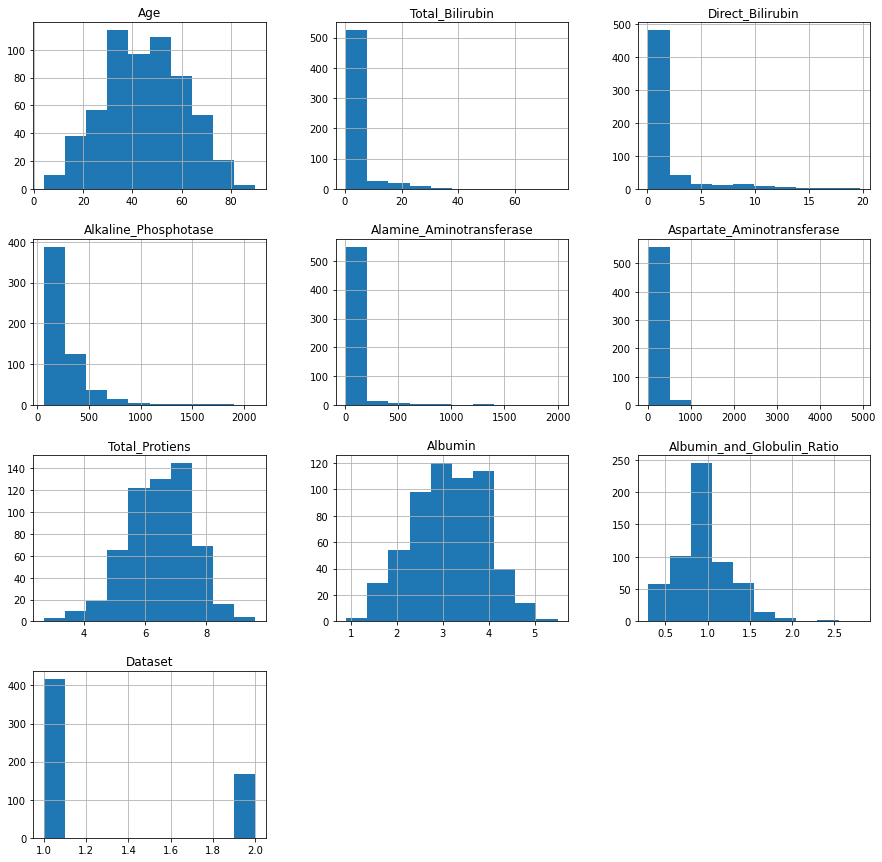

In [11]:
# Plot 
data.hist(figsize = (15,15), bins = 10) 
plt.show()

It seems that there is an outlier in the variables **Alamine_Aminotransferase**, **Aspartate_Aminotransferase**, as the maximum value is much higher than the average value.

In [12]:
# Function to adjust the target variable
# The negative class (does not have the disease) will be zero.
# The positive class (has the disease) will be one.

def adjust_var(x):
    if x == 2:
        return 0
    return 1

In [13]:
data['Dataset'] = data['Dataset'].map(adjust_var)

In [14]:
# Adjusting the name of the target variable
data.rename({'Dataset':'Target'}, axis = 'columns', inplace = True)

In [15]:
data.sample(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
488,60,Male,0.7,0.2,171,31,26,7.0,3.5,1.00,0
574,32,Male,12.1,6.0,515,48,92,6.6,2.4,0.50,1
290,45,Female,1.0,0.3,250,48,44,8.6,4.3,1.00,1
443,42,Female,0.7,0.2,152,35,81,6.2,3.2,1.06,1
350,37,Male,1.8,0.8,145,62,58,5.7,2.9,1.00,1


In [16]:
# Correlation between variables
data.corr()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,0.137351
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,0.220208
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,0.246046
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,0.184866
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,0.163416
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,0.151934
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,-0.035008
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,-0.161388
Albumin_and_Globulin_Ratio,-0.216408,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,-0.163131
Target,0.137351,0.220208,0.246046,0.184866,0.163416,0.151934,-0.035008,-0.161388,-0.163131,1.000000


### Exploration of the Categorical Variable

In [17]:
data.describe(include = ['object'])

,Gender
count,583
unique,2
top,Male
freq,441


Male:  441
Female:  142


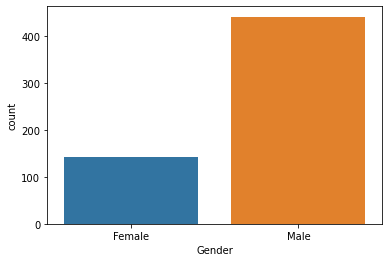

In [18]:
# Plot
sns.countplot(data = data, x = 'Gender', label = 'Count')

# Value counts
M, F = data['Gender'].value_counts()

# Print
print('Male: ', M)
print('Female: ', F)

#### Transforming the categorical variable into its numerical representation using label encoding

In [19]:
# Label encoding
def encoding_func(x):
    if x == 'Male':
        return 0
    return 1

In [20]:
data['Gender'] = data['Gender'].map(encoding_func)

In [21]:
data.sample(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
277,60,0,2.0,0.8,190,45,40,6.0,2.8,0.8,1
194,49,0,2.0,0.6,209,48,32,5.7,3.0,1.1,0
500,70,0,2.7,1.2,365,62,55,6.0,2.4,0.6,1
543,40,0,1.2,0.6,204,23,27,7.6,4.0,1.1,1
224,70,0,1.7,0.5,400,56,44,5.7,3.1,1.1,1


### Checking the Correlation Between Attributes

In [22]:
data.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
Age,1.000000,-0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,0.137351
Gender,-0.056560,1.000000,-0.089291,-0.100436,0.027496,-0.082332,-0.080336,0.089121,0.093799,0.003424,-0.082416
Total_Bilirubin,0.011763,-0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,0.220208
Direct_Bilirubin,0.007529,-0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,0.246046
Alkaline_Phosphotase,0.080425,0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,0.184866
Alamine_Aminotransferase,-0.086883,-0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,0.163416
Aspartate_Aminotransferase,-0.019910,-0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,0.151934
Total_Protiens,-0.187461,0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,-0.035008
Albumin,-0.265924,0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,-0.161388
Albumin_and_Globulin_Ratio,-0.216408,0.003424,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,-0.163131


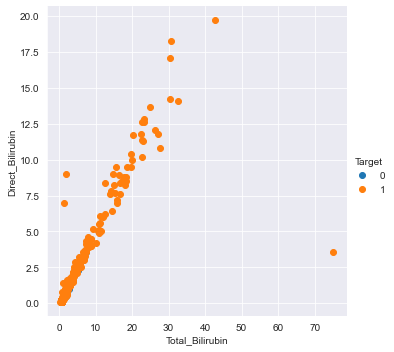

In [23]:
sns.set_style('darkgrid')  

# Facetgrid
sns.FacetGrid(data, hue = 'Target', size = 5).map(plt.scatter, 'Total_Bilirubin', 'Direct_Bilirubin').add_legend()

#### High correlation of variables, which could leave the model biased, so we will remove one later

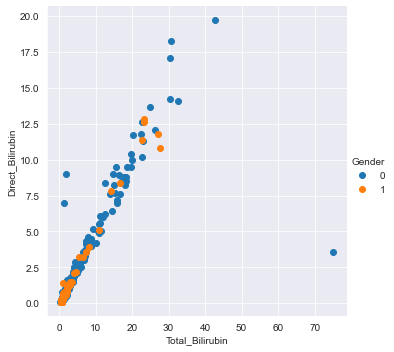

In [24]:
sns.set_style('darkgrid')  

# Facetgrid
sns.FacetGrid(data, hue = 'Gender', size = 5).map(plt.scatter, 'Total_Bilirubin', 'Direct_Bilirubin').add_legend()

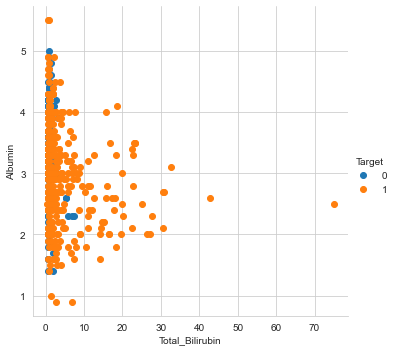

In [25]:
sns.set_style('whitegrid') 

# Facetgrid
sns.FacetGrid(data, hue = 'Target', size = 5).map(plt.scatter, 'Total_Bilirubin', 'Albumin').add_legend()

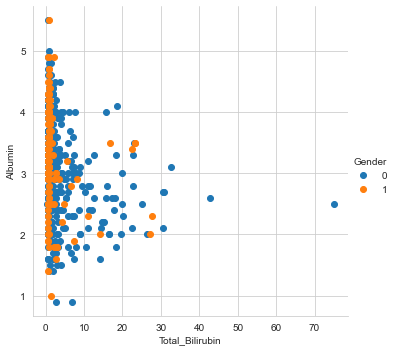

In [26]:
sns.set_style('whitegrid') 

# Facetgrid
sns.FacetGrid(data, hue = 'Gender', size = 5).map(plt.scatter, 'Total_Bilirubin', 'Albumin').add_legend()

### Checking for Missing Values and Duplicate Records

In [27]:
data[data.isnull().values]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
209,45,1,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,0,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,1,0.6,0.2,180,12,15,5.2,2.7,NaN,0
312,27,0,1.3,0.6,106,25,54,8.5,4.8,NaN,0


In [28]:
# Checking duplicate records (complete cases)
data[data.duplicated(keep = False)]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
18,40,1,0.9,0.3,293,232,245,6.8,3.1,0.80,1
19,40,1,0.9,0.3,293,232,245,6.8,3.1,0.80,1
25,34,0,4.1,2.0,289,875,731,5.0,2.7,1.10,1
26,34,0,4.1,2.0,289,875,731,5.0,2.7,1.10,1
33,38,1,2.6,1.2,410,59,57,5.6,3.0,0.80,0
34,38,1,2.6,1.2,410,59,57,5.6,3.0,0.80,0
54,42,0,8.9,4.5,272,31,61,5.8,2.0,0.50,1
55,42,0,8.9,4.5,272,31,61,5.8,2.0,0.50,1
61,58,0,1.0,0.5,158,37,43,7.2,3.6,1.00,1
62,58,0,1.0,0.5,158,37,43,7.2,3.6,1.00,1


## Data Cleaning

### Handling Duplicate Records

In [29]:
data.shape

(583, 11)

In [30]:
# Remove duplicate records (remove one of the duplicates)
data = data.drop_duplicates()
print(data.shape)

(570, 11)


### Outlier Treatment

In [31]:
data.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,566.000000,570.000000
mean,44.849123,0.245614,3.321754,1.497544,291.750877,79.728070,109.380702,6.496316,3.148947,0.948004,0.712281
std,16.242182,0.430829,6.267941,2.833231,245.291859,181.471697,290.880671,1.088300,0.796813,0.319635,0.453097
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,0.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.950000,1.000000
75%,58.000000,0.000000,2.600000,1.300000,298.000000,60.000000,86.750000,7.200000,3.800000,1.100000,1.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


<AxesSubplot:xlabel='Alamine_Aminotransferase'>

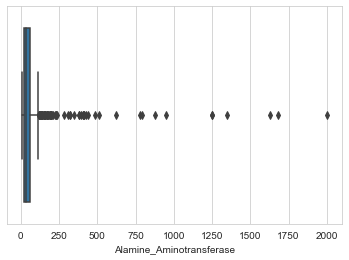

In [32]:
# Boxplot
sns.boxplot(data.Alamine_Aminotransferase)

In [33]:
data.Alamine_Aminotransferase.sort_values(ascending = False).head(10)

117    2000
27     1680
47     1630
118    1350
135    1250
119    1250
207     950
25      875
199     790
479     779
Name: Alamine_Aminotransferase, dtype: int64

In [34]:
data.shape

(570, 11)

In [35]:
# Keeps only records where the value is less than or equal to 1250
data = data[data.Alamine_Aminotransferase <= 1250]
data.shape

(566, 11)

<AxesSubplot:xlabel='Alamine_Aminotransferase'>

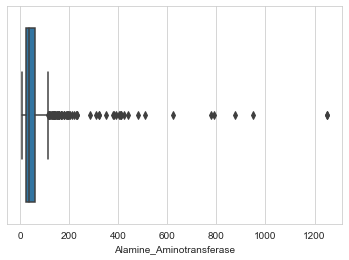

In [36]:
# Boxplot
sns.boxplot(data.Alamine_Aminotransferase)

<AxesSubplot:xlabel='Aspartate_Aminotransferase'>

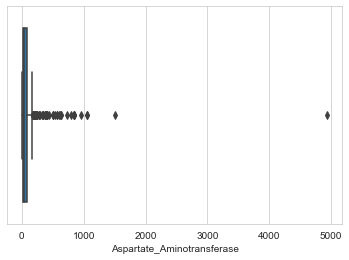

In [37]:
# Boxplot
sns.boxplot(data.Aspartate_Aminotransferase)

In [38]:
data.Aspartate_Aminotransferase.sort_values(ascending = False).head(10)

135    4929
207    1500
199    1050
119    1050
97      950
92      850
410     850
90      850
479     844
91      794
Name: Aspartate_Aminotransferase, dtype: int64

In [39]:
# Keeps only records where the value is less than or equal to 1500
data = data[data.Aspartate_Aminotransferase <= 1500]
data.shape

(565, 11)

<AxesSubplot:xlabel='Aspartate_Aminotransferase'>

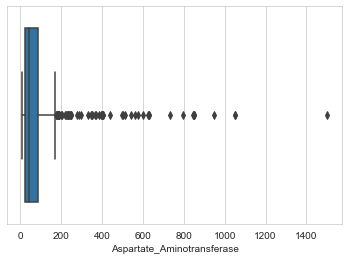

In [40]:
# Boxplot
sns.boxplot(data.Aspartate_Aminotransferase)

In [41]:
data.Aspartate_Aminotransferase.sort_values(ascending = False).head(10)

207    1500
119    1050
199    1050
97      950
92      850
410     850
90      850
479     844
91      794
25      731
Name: Aspartate_Aminotransferase, dtype: int64

In [42]:
data.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,561.000000,565.000000
mean,44.884956,0.247788,3.267611,1.471681,290.697345,66.433628,90.375221,6.500000,3.149735,0.947005,0.709735
std,16.263975,0.432110,6.249774,2.822838,243.894609,111.435275,152.814856,1.089261,0.798616,0.319623,0.454287
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.000000,0.800000,0.200000,175.000000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,0.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,0.000000,2.500000,1.200000,298.000000,60.000000,84.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,1250.000000,1500.000000,9.600000,5.500000,2.800000,1.000000


### Handling Missing Values

In [43]:
data.isnull().values.any()

True

In [44]:
# Checking how many columns have missing values
data.isnull().values.any().sum()

1

In [45]:
# List missing values
data[data.isnull().values]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
209,45,1,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,0,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,1,0.6,0.2,180,12,15,5.2,2.7,NaN,0
312,27,0,1.3,0.6,106,25,54,8.5,4.8,NaN,0


In [46]:
data.shape

(565, 11)

In [47]:
# Drop records with missing values in any column (any)
data = data.dropna(how = 'any')  

In [48]:
data.shape

(561, 11)

## Data Pre-Processing for Building Machine Learning Models

In [49]:
# Given the high correlation between the variables Direct_Bilirubin and Total_Bilirubin, let's remove Direct_Bilirubin
# Generally the "total" variable contains more information, so we will keep it
data = data.drop('Direct_Bilirubin', 1)

In [50]:
data.shape

(561, 10)

### Dividing into Training and Testing

In [51]:
data.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
0,65,1,0.7,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,195,27,59,7.3,2.4,0.40,1


In [52]:
# Create a separate object for the target variable
# Output variable
y = data.Target

In [53]:
# Create a separate object for the input variables
# Input variable
X = data.drop('Target', axis = 1)

In [54]:
# Split training and testing data
X_training, X_test, y_training, y_test = train_test_split(X, 
                                                        y, 
                                                        test_size = 0.25,       # 25% test / 75% training
                                                        random_state = seed,    # Allow it to maintain the same random pattern
                                                        stratify = data.Target) # Stratified sampling

In [55]:
len(X_training)

420

In [56]:
len(X_test)

141

In [57]:
print(X_training.shape, X_test.shape, y_training.shape, y_test.shape)

(420, 9) (141, 9) (420,) (141,)


### Class Balancing

In [58]:
y_training.value_counts()

1    299
0    121
Name: Target, dtype: int64

#### if we take many more examples of one class than the other, we will be reinforcing a pattern (class 1) and little of class 0, potentially leaving the model biased

In [59]:
!pip install -q imblearn

In [60]:
# SMOTE function: creates synthetic data with the same standard as class 0, increasing the amount of the minority class
import imblearn
from imblearn.over_sampling import SMOTE

In [61]:
# Applying oversampling
over_sampler = SMOTE(k_neighbors = 2)

In [62]:
X_res, y_res = over_sampler.fit_resample(X_training, y_training)

#### Balancing is applied only to the training data because these data are used to build the model.  
The test data, on the other hand, should remain unaltered so that they can effectively assess the performance of the trained model under real and unbiased conditions.

In [63]:
len(X_res)

598

In [64]:
len(y_res)

598

In [65]:
y_res.value_counts()

1    299
0    299
Name: Target, dtype: int64

In [66]:
X_training = X_res

In [67]:
y_training = y_res

### Data Standardization

In [68]:
X_training.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,50,0,1.7,331,36,53,7.3,3.4,0.9
1,75,0,10.6,562,37,29,5.1,1.8,0.5
2,48,1,0.8,150,25,23,7.5,3.9,1.0
3,55,0,0.7,290,53,58,6.8,3.4,1.0
4,49,0,3.9,189,65,181,6.9,3.0,0.7


In [69]:
# Calculating mean and standard deviation of training data
training_mean = X_training.mean()
training_std = X_training.std()
print(training_mean)
print(training_std)

Age                            43.302676
Gender                          0.209030
Total_Bilirubin                 2.613438
Alkaline_Phosphotase          267.168896
Alamine_Aminotransferase       58.347826
Aspartate_Aminotransferase     73.854515
Total_Protiens                  6.541300
Albumin                         3.247334
Albumin_and_Globulin_Ratio      0.990346
dtype: float64
Age                            16.728906
Gender                          0.406956
Total_Bilirubin                 5.491285
Alkaline_Phosphotase          214.304304
Alamine_Aminotransferase      100.355412
Aspartate_Aminotransferase    132.046096
Total_Protiens                  1.012577
Albumin                         0.750793
Albumin_and_Globulin_Ratio      0.304593
dtype: float64


In [70]:
# Standardization = (original value - mean) / standard deviation
X_training = (X_training - training_mean) / training_std

In [71]:
X_training.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,0.400344,-0.513643,-0.166343,0.297853,-0.222687,-0.157934,0.749276,0.203340,-0.296614
1,1.894764,-0.513643,1.454407,1.375759,-0.212722,-0.339688,-1.423398,-1.927740,-1.609844
2,0.280791,1.943623,-0.330239,-0.546741,-0.332297,-0.385127,0.946792,0.869303,0.031693
3,0.699228,-0.513643,-0.348450,0.106536,-0.053289,-0.120068,0.255487,0.203340,0.031693
4,0.340568,-0.513643,0.234292,-0.364757,0.066286,0.811425,0.354245,-0.329430,-0.953229


In [72]:
X_training.describe()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,5.980000e+02,5.980000e+02,5.980000e+02,5.980000e+02,5.980000e+02,5.980000e+02,5.980000e+02,5.980000e+02,5.980000e+02
mean,-1.234613e-16,-2.016224e-16,-4.555535e-16,-7.704725e-17,-8.280259e-17,1.280591e-17,-3.365572e-15,4.693384e-16,-1.991625e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.349387e+00,-5.136426e-01,-4.030820e-01,-8.967104e-01,-4.817660e-01,-4.835775e-01,-3.793587e+00,-3.126472e+00,-2.266458e+00
25%,-7.354142e-01,-5.136426e-01,-3.373415e-01,-4.662477e-01,-3.596998e-01,-3.851270e-01,-5.483607e-01,-5.958148e-01,-6.249214e-01
50%,1.014606e-01,-5.136426e-01,-3.120286e-01,-3.250933e-01,-2.725097e-01,-2.904631e-01,7.041665e-02,6.011771e-02,3.169335e-02
75%,6.992283e-01,-5.136426e-01,-1.481326e-01,8.203803e-02,-6.325345e-02,-5.948313e-02,6.505185e-01,7.538915e-01,4.911385e-01
max,2.791415e+00,1.943623e+00,1.318208e+01,7.600552e+00,1.187432e+01,1.080036e+01,2.625677e+00,3.000382e+00,5.941226e+00


When using a trained model with new data, it is essential to standardize these data exactly as the training data to ensure the model's effectiveness.

**Each and every transformation applied in training must be applied in testing and on new data**

In [73]:
X_test = (X_test - training_mean) / training_std

In [74]:
# Describe
X_test.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
54,-0.077870,-0.513643,1.144825,0.022543,-0.272510,-0.097349,-0.732092,-1.661355,-1.609844
524,-0.854968,-0.513643,-0.330239,-0.518743,-0.461837,-0.445712,0.255487,0.602918,0.360001
217,0.340568,-0.513643,-0.275607,-0.504744,-0.282474,-0.324542,0.453003,1.402073,1.673230
252,1.296996,-0.513643,-0.275607,-0.042784,-0.103112,-0.256384,0.453003,0.869303,0.688308
107,-0.436530,-0.513643,-0.330239,-0.509411,-0.292439,-0.263957,-0.534576,-1.394970,-1.609844


###  Model 1 - Logistic Regression (Benchmark)

In [75]:
# Hyperparameter list
# As we don't know which is the best hyperparameter, we put together a list to test which is the best among the options
tuned_params_v1 = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 
                   'penalty': ['l1', 'l2'],
                   'solver': ['liblinear']}

In [76]:
# Defining a fixed random state so there is no variation
model1 = LogisticRegression(random_state=seed)

In [77]:
# Creating the model with GridSearch
# Multiple models will be created with different combinations of hyperparameters
model_v1 = GridSearchCV(estimator=model1, 
                         param_grid=tuned_params_v1, 
                         scoring = 'roc_auc',
                         n_jobs = -1,
                         cv=5)

In [78]:
# Model training
model_v1.fit(X_training, y_training)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=1234), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='roc_auc')

In [79]:
# Selecting the best model
model_v1.best_estimator_

LogisticRegression(C=1000, random_state=1234, solver='liblinear')

In [80]:
# Predictions with test data
y_pred_v1 = model_v1.predict(X_test)

In [81]:
y_pred_v1[:10]

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0], dtype=int64)

In [82]:
# Predictions in probability format for each class
y_pred_proba_v1 = model_v1.predict_proba(X_test)
y_pred_proba_v1[:10]

array([[4.78235037e-02, 9.52176496e-01],
       [8.50859768e-01, 1.49140232e-01],
       [7.73131495e-01, 2.26868505e-01],
       [5.71338573e-01, 4.28661427e-01],
       [5.40253232e-01, 4.59746768e-01],
       [4.72933467e-01, 5.27066533e-01],
       [6.04095564e-01, 3.95904436e-01],
       [6.72295636e-01, 3.27704364e-01],
       [7.56326039e-06, 9.99992437e-01],
       [6.02051685e-01, 3.97948315e-01]])

In [83]:
# Predictions in probability format filtering for positive class (class 1)
# This is used to calculate the ROC Curve
y_pred_proba_v1 = model_v1.predict_proba(X_test)[:,1]
y_pred_proba_v1[:10]

array([0.9521765 , 0.14914023, 0.22686851, 0.42866143, 0.45974677,
       0.52706653, 0.39590444, 0.32770436, 0.99999244, 0.39794832])

In [84]:
# As an example, let's check one of the data points (change the value of i if desired)
i = 15 
print('For data point {}, actual class = {}, predicted class = {}, predicted probability = {}'.
      format(i, y_test.iloc[i], y_pred_v1[i], y_pred_proba_v1[i]))

For data point 15, actual class = 1, predicted class = 1, predicted probability = 0.7094952314400329


In [85]:
# Confusion matrix
confusion_matrix(y_test, y_pred_v1)

array([[32,  9],
       [42, 58]], dtype=int64)

In [86]:
# Extracting each value from CM
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_v1).ravel()
print(tn, fp, fn, tp)

32 9 42 58


In [87]:
# Calculates the global AUC (Area Under The Curve) metric with real data and test predictions
roc_auc_v1 = roc_auc_score(y_test, y_pred_v1)
print(roc_auc_v1)

0.6802439024390246


In [88]:
# Calculate the ROC curve with test data and predictions
fpr_v1, tpr_v1, thresholds = roc_curve(y_test, y_pred_proba_v1)

In [89]:
# Test AUC
auc_v1 = auc(fpr_v1, tpr_v1)
print(auc_v1)

0.7341463414634147


In [90]:
# Test accuracy
accuracy_v1 = accuracy_score(y_test, y_pred_v1)
print(accuracy_v1)

0.6382978723404256


### Feature Importance

In [91]:
# Building the model again with the best hyperparameter
# This is necessary because the final version should not have GridSearchCV
model_v1 = LogisticRegression(C = 1000,solver='liblinear')
model_v1.fit(X_training, y_training)

LogisticRegression(C=1000, solver='liblinear')

In [92]:
# Obtain the coefficients by the highest value
indices = np.argsort(-abs(model_v1.coef_[0,:]))

In [93]:
print("Most important variables for the result of model_v1:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

Most important variables for the result of model_v1:
--------------------------------------------------
Total_Bilirubin
Albumin
Total_Protiens
Aspartate_Aminotransferase
Alamine_Aminotransferase
Albumin_and_Globulin_Ratio
Age
Alkaline_Phosphotase
Gender


In [94]:
# Save the model in disk
with open('models/model_v1.pkl', 'wb') as pickle_file:
      joblib.dump(model_v1, 'models/model_v1.pkl') 

In [95]:
# Create a dataframe to receive the metrics for each model
df_models = pd.DataFrame()

In [96]:
# Dictionary with model_v1 metrics
dict_model_v1 = { 'Name': 'model_v1', 
                  'Algorithm': 'Logistic Regression', 
                  'ROC_AUC Score': roc_auc_v1,
                  'AUC Score': auc_v1,
                  'Accuracy': accuracy_v1}

In [97]:
# Add the dict to the dataframe
df_models = df_models.append(dict_model_v1, ignore_index = True)

In [98]:
display(df_models)

,Name,Algorithm,ROC_AUC Score,AUC Score,Accuracy
0,model_v1,Logistic Regression,0.680244,0.734146,0.638298


### Model 2 - Random Forest

Now we try to get a better model than version 1. Trying the Random Forest Algorithm

In [99]:
# Hyperparameter Grid
# We put a grid of hyperparameters to test which is the most ideal
# otherwise scikitlearn sets the default value and we would not be able to know if it is the ideal value for the current data
tuned_params_v2 = {'n_estimators': [100, 200, 300, 400, 500], 
                   'min_samples_split': [2, 5, 10], 
                   'min_samples_leaf': [1, 2, 4],
                   'max_depth': [None, 10, 20, 30]}

In [100]:
# Defining a fixed random state so there is no variation
model2 = RandomForestClassifier(random_state=seed)

In [101]:
# Create the model with RandomizedSearchCV to search for the best combination of hyperparameters
model_v2 = RandomizedSearchCV(estimator=model2, 
                               param_distributions=tuned_params_v2, 
                               n_iter = 15, 
                               scoring = 'roc_auc', 
                               n_jobs  = -1,
                               random_state=seed,
                               cv = 5)

In [102]:
# Train the model
model_v2.fit(X_training, y_training)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1234),
                   n_iter=15, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=1234, scoring='roc_auc')

In [103]:
# Extract the best model
model_v2.best_estimator_

RandomForestClassifier(max_depth=20, n_estimators=200, random_state=1234)

In [104]:
# Extract the best parameters
model_v2.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 20}

In [105]:
# Test predictions
y_pred_v2 = model_v2.predict(X_test)

In [106]:
# Predictions for the positive class
y_pred_proba_v2 = model_v2.predict_proba(X_test)[:,1]

In [107]:
# Confusion Matrix
confusion_matrix(y_test, y_pred_v2)

array([[14, 27],
       [19, 81]], dtype=int64)

In [108]:
# Calculates the global AUC (Area Under The Curve) metric with real data and test predictions
roc_auc_v2 = roc_auc_score(y_test, y_pred_v2)
print(roc_auc_v2)

0.5757317073170731


In [109]:
# Calculate the ROC curve with test data and predictions
fpr_v2, tpr_v2, thresholds = roc_curve(y_test, y_pred_proba_v2)

In [110]:
# Test AUC
auc_v2 = auc(fpr_v2, tpr_v2)
print(auc_v2)

0.7240243902439024


In [111]:
# Test accuracy
accuracy_v2 = accuracy_score(y_test, y_pred_v2)
print(accuracy_v2)

0.6737588652482269


### Feature Importance

In [112]:
# Building the model again with the best hyperparameter
model_v2 = RandomForestClassifier(n_estimators = 200, min_samples_split = 2, min_samples_leaf = 1, max_depth = 20)
model_v2.fit(X_training, y_training)

RandomForestClassifier(max_depth=20, n_estimators=200)

In [113]:
# Most relevantes variables
index = np.argsort(-model_v2.feature_importances_)
print("Most important variables for the result of model_v2:")
print(50*'-')
for feature in X.columns[index]:
    print(feature)

Most important variables for the result of model_v2:
--------------------------------------------------
Total_Bilirubin
Alkaline_Phosphotase
Albumin_and_Globulin_Ratio
Aspartate_Aminotransferase
Alamine_Aminotransferase
Age
Albumin
Total_Protiens
Gender


In [114]:
# Save the model in disk
with open('models/model_v2.pkl', 'wb') as pickle_file:
      joblib.dump(model_v2, 'models/model_v2.pkl') 

In [115]:
# Dictionary with model_v2 metrics
dict_model_v2 = {'Name': 'model_v2', 
                  'Algorithm': 'Random Forest', 
                  'ROC_AUC Score': roc_auc_v2,
                  'AUC Score': auc_v2,
                  'Accuracy': accuracy_v2}

In [116]:
# Add the dict to the dataframe
df_models = df_models.append(dict_model_v2, ignore_index = True)

In [117]:
display(df_models)

,Name,Algorithm,ROC_AUC Score,AUC Score,Accuracy
0,model_v1,Logistic Regression,0.680244,0.734146,0.638298
1,model_v2,Random Forest,0.575732,0.724024,0.673759


### Model 3 - KNN

Let's now try a simpler algorithm, KNN. For this algorithm we first need to define the value of K, which is the number of nearest neighbors.

In [118]:
# List of possible K values
neighbor = list(range(1, 20, 2))

In [119]:
# Scores list
cv_scores = []

In [120]:
# Cross validation to determine the best K value
for k in neighbor:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X_training, y_training, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())   

In [121]:
# Adjusting the classification error
error = [1 - x for x in cv_scores]

In [122]:
# Determining the best value of k (with lowest error)
optimal_k = neighbor[error.index(min(error))]
print('The ideal value of k is %d' % optimal_k)

The ideal value of k is 1


In [123]:
# Model version 3
model_v3 = KNeighborsClassifier(n_neighbors = optimal_k)

In [124]:
# Training
model_v3.fit(X_training, y_training)

KNeighborsClassifier(n_neighbors=1)

In [125]:
# Predictions
y_pred_v3 = model_v3.predict(X_test)

In [126]:
# Confusion Matrix
confusion_matrix(y_test, y_pred_v3)

array([[21, 20],
       [33, 67]], dtype=int64)

In [127]:
# Positive class probability prediction
y_pred_proba_v3 = model_v3.predict_proba(X_test)[:,1]

In [128]:
# Calculates the global AUC (Area Under The Curve) metric with real data and test predictions
roc_auc_v3 = roc_auc_score(y_test, y_pred_v3)
print(roc_auc_v3)

0.5910975609756097


In [129]:
# Calculate the ROC curve with test data and predictions
fpr_v3, tpr_v3, thresholds = roc_curve(y_test, y_pred_proba_v3)

In [130]:
# Test AUC
auc_v3 = auc(fpr_v3, tpr_v3)
print(auc_v3)

0.5910975609756097


In [131]:
# Test accuracy
accuracy_v3 = accuracy_score(y_test, y_pred_v3)
print(accuracy_v3)

0.624113475177305


**Note:** With the KNN algorithm we do not extract the most important variables, as the concept of the algorithm is different.

In [132]:
# Save the model in disk
with open('models/model_v3.pkl', 'wb') as pickle_file:
      joblib.dump(model_v3, 'models/model_v3.pkl') 

In [133]:
# Dictionary with model_v3 metrics
dict_model_v3 = { 'Name': 'model_v3', 
                  'Algorithm': 'KNN', 
                  'ROC_AUC Score': roc_auc_v3,
                  'AUC Score': auc_v3,
                  'Accuracy': accuracy_v3}

In [134]:
# Adiciona o dict ao dataframe
df_models = df_models.append(dict_model_v3, ignore_index = True)

In [135]:
display(df_models)

,Name,Algorithm,ROC_AUC Score,AUC Score,Accuracy
0,model_v1,Logistic Regression,0.680244,0.734146,0.638298
1,model_v2,Random Forest,0.575732,0.724024,0.673759
2,model_v3,KNN,0.591098,0.591098,0.624113


### Model 4 - Decision Tree

In [136]:
# Hyperparameters
tuned_params_v4 = {'min_samples_split': [2, 3, 4, 5, 7], 
                   'min_samples_leaf': [1, 2, 3, 4, 6], 
                   'max_depth': [2, 3, 4, 5, 6, 7]}

In [137]:
model4 = DecisionTreeClassifier(random_state=seed)

In [138]:
# Create the model with RandomizedSearchCV
model_v4 = RandomizedSearchCV(estimator = model4, 
                               param_distributions = tuned_params_v4,
                               n_iter = 15, 
                               scoring = 'roc_auc', 
                               random_state = seed,
                               n_jobs = -1,
                               cv = 5)

In [139]:
# Training
model_v4.fit(X_training, y_training)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1234),
                   n_iter=15, n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7],
                                        'min_samples_leaf': [1, 2, 3, 4, 6],
                                        'min_samples_split': [2, 3, 4, 5, 7]},
                   random_state=1234, scoring='roc_auc')

In [140]:
# Best model
model_v4.best_estimator_

DecisionTreeClassifier(max_depth=6, min_samples_leaf=6, min_samples_split=4,
                       random_state=1234)

In [141]:
# Class predictions
y_pred_v4 = model_v4.predict(X_test)

In [142]:
# Probability predictions
y_pred_proba_v4 = model_v4.predict_proba(X_test)[:,1]

In [143]:
# Confusion matrix
confusion_matrix(y_test, y_pred_v4)

array([[31, 10],
       [42, 58]], dtype=int64)

In [144]:
# Calculates the global AUC (Area Under The Curve) metric with real data and test predictions
roc_auc_v4 = roc_auc_score(y_test, y_pred_v4)
print(roc_auc_v4)

0.6680487804878049


In [145]:
# Calculate the ROC curve with test data and predictions
fpr_v4, tpr_v4, thresholds = roc_curve(y_test, y_pred_proba_v4)

In [146]:
# Test AUC
auc_v4 = auc(fpr_v4, tpr_v4)
print(auc_v4)

0.6681707317073171


In [147]:
# Test accuracy
accuracy_v4 = accuracy_score(y_test, y_pred_v4)
print(accuracy_v4)

0.6312056737588653


### Feature Importance

In [148]:
# Recreating the model
model_v4 = DecisionTreeClassifier(min_samples_split = 6, min_samples_leaf = 6, max_depth = 4)
model_v4.fit(X_training, y_training)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=6, min_samples_split=6)

In [149]:
# Most important variables
index = np.argsort(-model_v4.feature_importances_)
print("Most important variables for the result of modelo_v4:")
print(50*'-')
for feature in X.columns[index]:
    print(feature)

Most important variables for the result of modelo_v4:
--------------------------------------------------
Total_Bilirubin
Alkaline_Phosphotase
Age
Alamine_Aminotransferase
Total_Protiens
Albumin
Albumin_and_Globulin_Ratio
Gender
Aspartate_Aminotransferase


In [150]:
# Save the model in disk
with open('models/model_v4.pkl', 'wb') as pickle_file:
      joblib.dump(model_v4, 'models/model_v4.pkl') 

In [151]:
# Dictionary with model_v4 metrics
dict_model_v4 = {'Name': 'model_v4', 
                  'Algorithm': 'Decision Tree', 
                  'ROC_AUC Score': roc_auc_v4,
                  'AUC Score': auc_v4,
                  'Accuracy': accuracy_v4}

In [152]:
# Adiciona o dict ao dataframe
df_models = df_models.append(dict_model_v4, ignore_index = True)

In [153]:
display(df_models)

,Name,Algorithm,ROC_AUC Score,AUC Score,Accuracy
0,model_v1,Logistic Regression,0.680244,0.734146,0.638298
1,model_v2,Random Forest,0.575732,0.724024,0.673759
2,model_v3,KNN,0.591098,0.591098,0.624113
3,model_v4,Decision Tree,0.668049,0.668171,0.631206


### Model 5 - SVM

In [154]:
# Function for hyperparameter selection
def svc_param_selection(X, y, nfolds,random_state = seed):
    Cs = [0.001, 0.01, 0.1, 1, 10] # hyperparameters
    gammas = [0.001, 0.01, 0.1, 1] # hyperparameters
    param_grid = {'C': Cs, 'gamma' : gammas}
    
    grid_search = GridSearchCV(SVC(kernel = 'rbf', random_state = seed), param_grid, cv = nfolds) # create the model with the kernel 'rbf'
    grid_search.fit(X_training, y_training)
    grid_search.best_params_
    return grid_search.best_params_

In [155]:
# Apply the function
svc_param_selection(X_training, y_training, 5)

{'C': 10, 'gamma': 1}

In [156]:
# Create the model with the best hyperparameters
model_v5 = SVC(C = 10, gamma = 1, probability = True)

In [157]:
# Training
model_v5.fit(X_training, y_training)

SVC(C=10, gamma=1, probability=True)

In [158]:
# Class predictions
y_pred_v5 = model_v5.predict(X_test)

In [159]:
confusion_matrix(y_test, y_pred_v5)

array([[21, 20],
       [23, 77]], dtype=int64)

In [160]:
# Probability predictions
y_pred_proba_v5 = model_v5.predict_proba(X_test)[:, 1]

In [161]:
# ROC AUC score
roc_auc_v5 = roc_auc_score(y_test, y_pred_v5)
print(roc_auc_v5)

0.6410975609756098


In [162]:
# ROC curve
fpr_v5, tpr_v5, thresholds = roc_curve(y_test, y_pred_proba_v5)

In [163]:
# AUC score
auc_v5 = auc(fpr_v5, tpr_v5)
print(auc_v5)

0.6334146341463415


In [164]:
# Accuracy
accuracy_v5 = accuracy_score(y_test, y_pred_v5)
print(accuracy_v5)

0.6950354609929078


In [165]:
# Save the model in disk
with open('models/model_v5.pkl', 'wb') as pickle_file:
      joblib.dump(model_v5, 'models/model_v5.pkl') 

In [166]:
# Dictionary with model_v5 metrics
dict_model_v5 = {'Name': 'model_v5', 
                  'Algorithm': 'SVM', 
                  'ROC_AUC Score': roc_auc_v5,
                  'AUC Score': auc_v5,
                  'Accuracy': accuracy_v5}

In [167]:
# Add the dict to the dataframe
df_models = df_models.append(dict_model_v5, ignore_index = True)

In [168]:
display(df_models)

,Name,Algorithm,ROC_AUC Score,AUC Score,Accuracy
0,model_v1,Logistic Regression,0.680244,0.734146,0.638298
1,model_v2,Random Forest,0.575732,0.724024,0.673759
2,model_v3,KNN,0.591098,0.591098,0.624113
3,model_v4,Decision Tree,0.668049,0.668171,0.631206
4,model_v5,SVM,0.641098,0.633415,0.695035


### Selection of the Best Model

In [169]:
# We will use the model that had the highest AUC Score, as it is a global metric
# The AUC score is ideal for comparing models from different algorithms
df_best_model = df_models[df_models['AUC Score'] == df_models['AUC Score'].max()]

In [170]:
df_best_model

,Name,Algorithm,ROC_AUC Score,AUC Score,Accuracy
0,model_v1,Logistic Regression,0.680244,0.734146,0.638298


## Predictions with the Best Model

In [171]:
# Getting the best model
model = df_best_model.Name.to_string(index = False)
model

'model_v1'

In [172]:
# Load the best model
best_model = joblib.load('models/' + model + '.pkl')
best_model

LogisticRegression(C=1000, solver='liblinear')

In [173]:
data.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Target'],
      dtype='object')

In [174]:
# Raw data from a new patient
# The number of columns must be the same as what was used in training
new_pacient = [72, 1, 0.8, 186, 15, 29, 7.1, 3.4, 0.97]

In [175]:
# Convert object to array
arr_pacient = np.array(new_pacient)

In [176]:
# Standardizing new data
arr_pacient = (arr_pacient - training_mean) / training_std

In [177]:
# Convert object to array
arr_pacient = np.array(arr_pacient)

In [178]:
# Standardized patient data (exactly how the model expects to receive the data)
arr_pacient

array([ 1.71543338,  1.94362348, -0.33023931, -0.37875532, -0.43194308,
       -0.33968831,  0.55176063,  0.20334019, -0.06679887])

In [179]:
# Class prediction
pred_new_pacient = best_model.predict(arr_pacient.reshape(1, -1))

In [180]:
# Verify the value and prints the final result
if pred_new_pacient == 1:
    print('This patient must have liver disease!')
else:
    print('This patient must not have liver disease!')

This patient must have liver disease!


# Fim